In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
populacoes = pd.read_excel('./POP2022_Municipios.xls', sheet_name='Municípios', header=1)[:5570]
populacoes = populacoes[populacoes['POPULAÇÃO'].apply(lambda t: '(' not in str(t))]
populacoes['POPULAÇÃO'] = pd.to_numeric(populacoes['POPULAÇÃO'])
populacoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5540 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UF                 5540 non-null   object 
 1   COD. UF            5540 non-null   float64
 2   COD. MUNIC         5540 non-null   float64
 3   NOME DO MUNICÍPIO  5540 non-null   object 
 4   POPULAÇÃO          5540 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 259.7+ KB


<BarContainer object of 5540 artists>

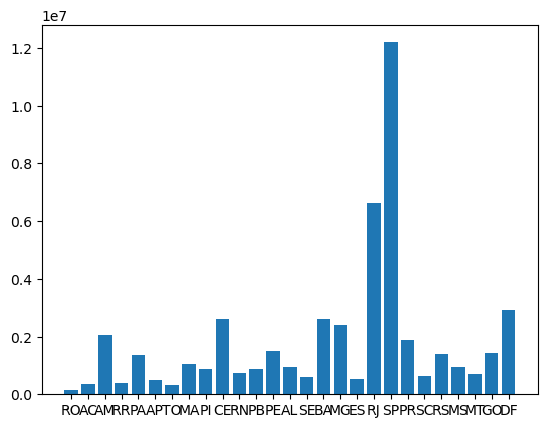

In [12]:
plt.bar(populacoes.UF, populacoes['POPULAÇÃO'])

In [13]:
populacoes['POPULACAO_LOG'] = np.log(populacoes.POPULAÇÃO)

(array([  4.,   5.,  16.,  60., 115., 151., 241., 250., 350., 320., 365.,
        352., 305., 422., 364., 338., 318., 274., 247., 202., 150., 118.,
         94.,  90.,  81.,  53.,  50.,  33.,  31.,  29.,  22.,  23.,  18.,
         11.,   7.,  11.,   5.,   2.,   4.,   1.,   2.,   3.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 6.72862861,  6.92039527,  7.11216192,  7.30392857,  7.49569523,
         7.68746188,  7.87922853,  8.07099518,  8.26276184,  8.45452849,
         8.64629514,  8.8380618 ,  9.02982845,  9.2215951 ,  9.41336176,
         9.60512841,  9.79689506,  9.98866171, 10.18042837, 10.37219502,
        10.56396167, 10.75572833, 10.94749498, 11.13926163, 11.33102829,
        11.52279494, 11.71456159, 11.90632824, 12.0980949 , 12.28986155,
        12.4816282 , 12.67339486, 12.86516151, 13.05692816, 13.24869482,
        13.44046147, 13.63222812, 13.82399477, 14.01576143, 14.20752808,
        14.39929473, 14.59106139, 14.78282804, 14.97459469, 15.16636135,
 

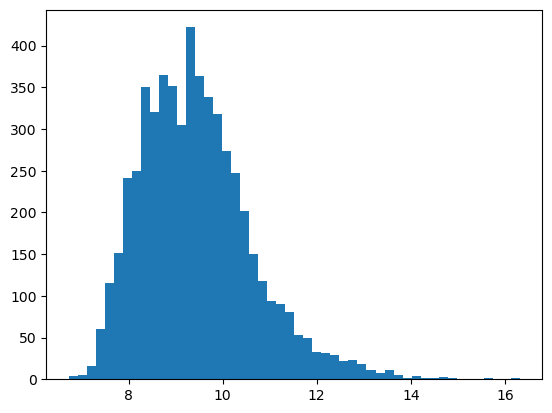

In [14]:
plt.hist(populacoes.POPULACAO_LOG, bins=50)

In [15]:
populacoes.UF.value_counts()

UF
MG    853
SP    645
RS    497
BA    414
PR    398
SC    295
GO    245
PI    224
PB    223
MA    216
PE    184
CE    184
RN    167
PA    143
MT    141
TO    139
AL    102
RJ     92
MS     79
ES     78
SE     75
RO     51
AM     41
AC     22
AP     16
RR     15
DF      1
Name: count, dtype: int64

In [16]:
coordenadas = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

In [17]:
coordenadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo_ibge   5570 non-null   int64  
 1   nome          5570 non-null   object 
 2   latitude      5570 non-null   float64
 3   longitude     5570 non-null   float64
 4   capital       5570 non-null   int64  
 5   codigo_uf     5570 non-null   int64  
 6   siafi_id      5570 non-null   int64  
 7   ddd           5570 non-null   int64  
 8   fuso_horario  5570 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 391.8+ KB


In [20]:
municipios = pd.merge(populacoes, coordenadas, left_on='NOME DO MUNICÍPIO', right_on='nome')

In [21]:
municipios.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,RO,11.0,15.0,Alta Floresta D'Oeste,21558,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
1,RO,11.0,23.0,Ariquemes,100896,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
2,RO,11.0,31.0,Cabixi,5107,1100031,Cabixi,-13.49450,-60.5520,0,11,37,69,America/Porto_Velho
3,RO,11.0,49.0,Cacoal,92202,1100049,Cacoal,-11.43430,-61.4562,0,11,9,69,America/Porto_Velho
4,RO,11.0,56.0,Cerejeiras,15237,1100056,Cerejeiras,-13.18700,-60.8168,0,11,27,69,America/Porto_Velho


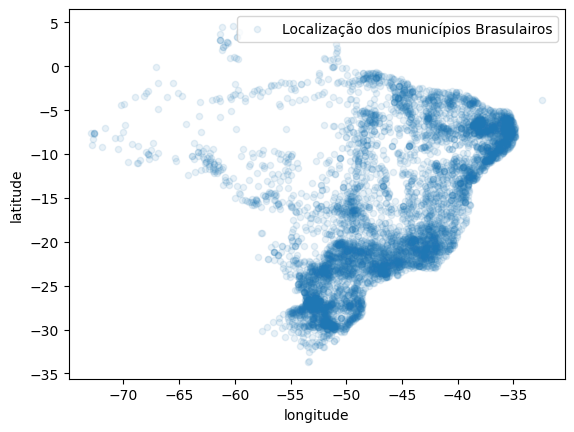

In [23]:
municipios.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, label='Localização dos municípios Brasulairos')
plt.legend()

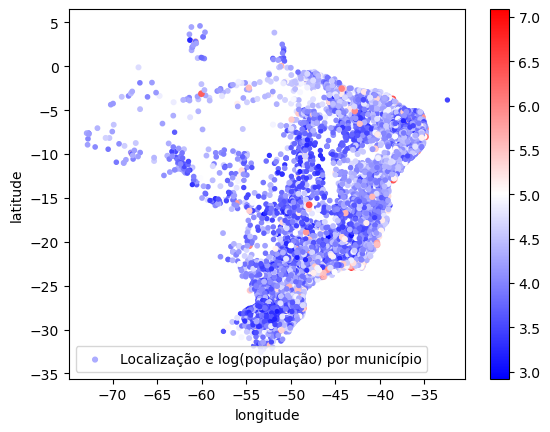

In [90]:
text_label = 'Localização e log(população) por município'
size_config = np.log(municipios['POPULAÇÃO'])
color_config=np.log10(municipios['POPULAÇÃO'])

municipios.plot(kind='scatter', x='longitude', y='latitude', s=size_config, c=color_config, cmap=plt.get_cmap('bwr'), colorbar=True, label=text_label)
plt.legend()